# Activity Recognition system based on Multisensor data fusion (AReM) Data Set

# Importing Required Packages

In [33]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Extracting the files from zip

In [16]:
def all_files(path):
    try:
        import pandas as pd
        import os
        files = [file for file in os.listdir(path) if not file.startswith('.')]
        all_data = pd.DataFrame()
        for file in files:
            current_data = pd.read_csv(path+"/"+file ,  encoding = "ISO-8859-1", skiprows=4,on_bad_lines='skip')  
            all_data = pd.concat([all_data,current_data])
        return all_data
    except Exception as e:
        print(e)

In [17]:
df_bending1 = all_files("D:\\AReM\\bending1")
df_bending1['label'] = 'bending1'
df_bending1.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [18]:
df_bending2 = all_files("D:\\AReM\\bending2")
df_bending2['label'] = 'bending2'
df_bending2.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,23.75,0.43,24.00,0.00,24.67,0.47,bending2
1,250,22.67,0.94,24.00,0.00,24.67,0.94,bending2
2,500,21.33,0.47,24.00,0.00,24.75,0.83,bending2
3,750,21.00,0.00,24.00,0.00,25.25,1.09,bending2
4,1000,23.00,0.71,23.75,0.43,24.75,0.83,bending2


In [19]:
df_cycling = all_files("D:\\AReM\\cycling")
df_cycling['label'] = 'cycling'
df_cycling.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,32.0,4.85,17.50,3.35,22.50,3.20,cycling
1,250,40.5,1.12,14.00,2.24,21.75,1.30,cycling
2,500,40.5,2.60,11.33,4.50,18.25,5.31,cycling
3,750,34.5,1.50,20.67,2.87,19.00,2.83,cycling
4,1000,34.5,1.50,21.25,3.27,18.25,4.38,cycling


In [20]:
df_cycling.shape

(7198, 8)

In [21]:
df_lying = all_files("D:\\AReM\\lying")
df_lying['label'] = 'lying'
df_lying.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,29.0,0.0,9.00,0.71,8.50,0.50,lying
1,250,29.0,0.0,8.00,0.71,8.50,0.50,lying
2,500,29.0,0.0,8.00,0.71,8.00,1.00,lying
3,750,28.5,0.5,8.25,0.43,8.75,0.43,lying
4,1000,29.0,0.0,8.75,1.09,9.00,0.00,lying


In [22]:
df_sitting = all_files("D:\\AReM\\sitting")
df_sitting['label'] = 'sitting'
df_sitting.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,42.0,0.0,19.20,0.98,15.50,2.06,sitting
1,250,42.0,0.0,19.33,0.94,11.00,0.82,sitting
2,500,42.0,0.0,17.50,0.50,12.50,0.50,sitting
3,750,42.0,0.0,17.00,1.41,13.33,0.94,sitting
4,1000,42.0,0.0,17.50,0.87,12.00,0.82,sitting


In [23]:
df_standing = all_files("D:\\AReM\\standing")
df_standing['label'] = 'standing'
df_standing.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,46.5,0.5,11.50,0.50,20.33,0.94,standing
1,250,46.5,0.5,12.00,0.00,20.25,0.43,standing
2,500,46.5,0.5,12.00,0.00,20.50,0.50,standing
3,750,46.5,0.5,12.75,0.43,19.50,0.50,standing
4,1000,46.5,0.5,13.25,0.43,18.75,0.43,standing


In [24]:
df_walking = all_files("D:\\AReM\\walking")
df_walking['label'] = 'walking'
df_walking.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,35.00,3.67,16.50,3.77,14.00,1.63,walking
1,250,28.50,3.35,17.50,3.77,12.25,3.90,walking
2,500,35.50,2.87,15.75,2.86,17.75,5.07,walking
3,750,29.75,12.19,16.25,2.17,20.75,2.59,walking
4,1000,27.00,2.12,16.75,0.83,24.75,1.64,walking


## Final Dataframe 

In [26]:
df_final=pd.concat([df_bending1, df_bending2, df_cycling, df_lying, df_sitting, df_standing, df_walking])

In [27]:
df_final.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [28]:
df_final.columns

Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23', 'label'],
      dtype='object')

In [29]:
columns = {'# Columns: time' : 'Time', 'avg_rss12' : 'avg_rss12' , 'var_rss12' : 'var_rss12',
                    'avg_rss13': 'avg_rss13', 'var_rss13':'var_rss13', 'avg_rss23':'avg_rss23', 'var_rss23':'var_rss23',
                    'label':'label'}

In [30]:
df_final.rename(columns=columns, inplace=True)

In [31]:
df_final.head()

,Time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [32]:
df_final.shape

(42237, 8)

## EDA 

In [34]:
profile = ProfileReport(df_final, title="Pandas Profiling Report")

In [35]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

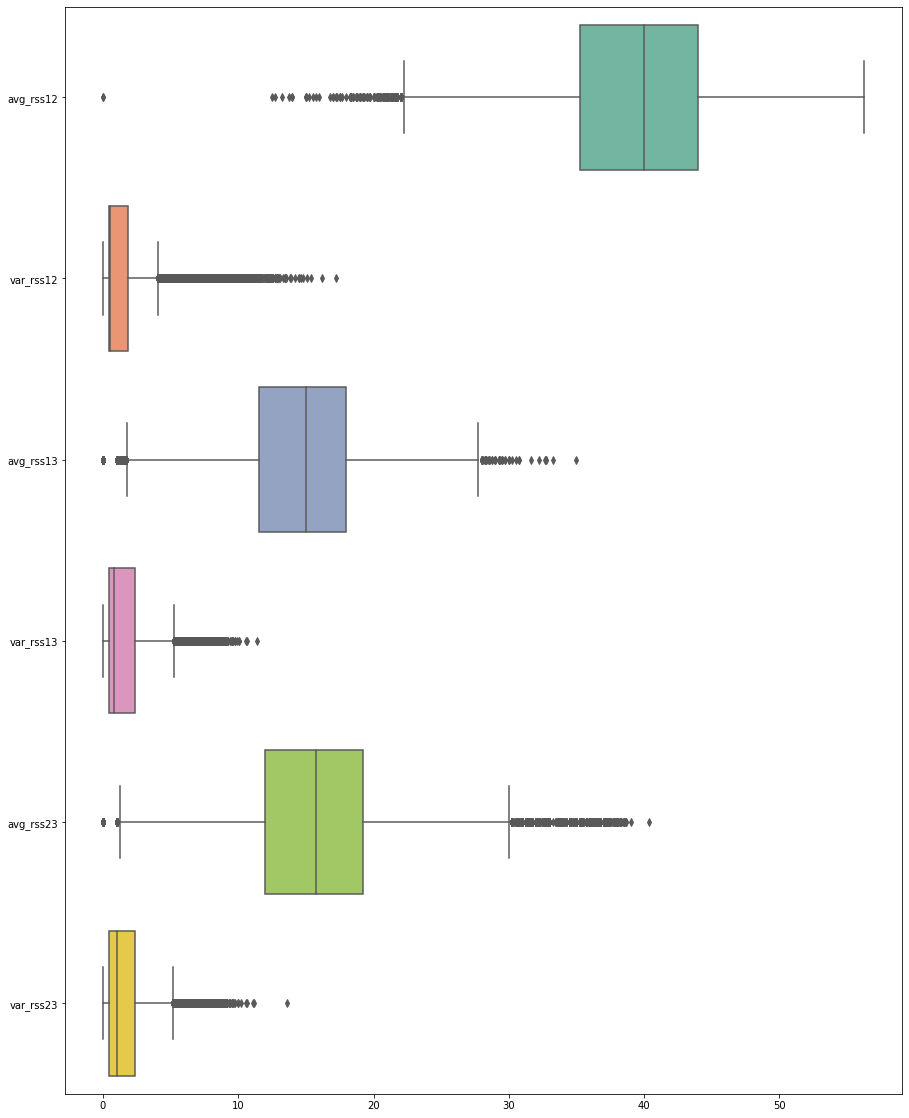

In [40]:
plt.figure(figsize=(15,20))
ax = sns.boxplot(data=df_final.iloc[:, 1:], orient="h", palette="Set2")

In [45]:
df_final.corr()

ValueError: could not convert string to float: '0 32.50 0.50 0.00 0.00 19.00 1.00 '

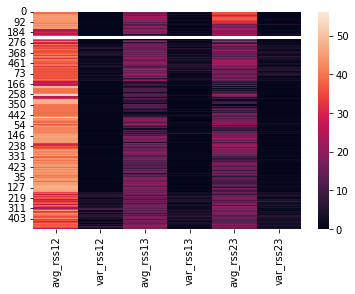

In [42]:
ax = sns.heatmap(df_final.iloc[:, 1:7])
plt.show()

In [47]:
df_final.isnull().sum()

Time           0
avg_rss12    480
var_rss12    480
avg_rss13    480
var_rss13    480
avg_rss23    480
var_rss23    480
label          0
dtype: int64

In [46]:
df_final.isna().sum()

Time           0
avg_rss12    480
var_rss12    480
avg_rss13    480
var_rss13    480
avg_rss23    480
var_rss23    480
label          0
dtype: int64

In [48]:
df_final.dropna(inplace=True)

In [49]:
df_final.shape

(41757, 8)

In [50]:
scaler = StandardScaler()

In [51]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_final[['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23']]), columns=['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23'])

In [52]:
df_scaled.head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.036323,-0.507420,1.551777,-0.658797,2.620898,-0.201656
1,0.036323,-0.507420,1.597951,-0.920315,2.510088,-0.993051
2,0.036323,-0.507420,1.644125,-0.658797,2.510088,-0.993051
3,0.076021,-0.473364,1.597951,-0.488506,2.510088,-0.993051
4,0.076021,-0.473364,1.782646,-0.920315,2.510088,-0.993051


In [53]:
x = df_scaled
x

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.036323,-0.507420,1.551777,-0.658797,2.620898,-0.201656
1,0.036323,-0.507420,1.597951,-0.920315,2.510088,-0.993051
2,0.036323,-0.507420,1.644125,-0.658797,2.510088,-0.993051
3,0.076021,-0.473364,1.597951,-0.488506,2.510088,-0.993051
4,0.076021,-0.473364,1.782646,-0.920315,2.510088,-0.993051
...,...,...,...,...,...,...
41752,-1.194322,0.090995,-0.341343,1.025865,-0.260180,1.709865
41753,-1.856489,-0.108477,-0.557436,-0.348625,0.589369,1.442008
41754,-0.193927,3.019820,-0.027362,0.587974,0.183063,-0.487776
41755,-0.837038,-0.084151,0.258914,2.248309,0.072252,0.644527


In [55]:
df_final.label = df_final.label.astype('category')

In [57]:
#df_final.info()

In [60]:
df_final.label = df_final.label.cat.codes

In [61]:
y = df_final[['label']]

In [62]:
y.value_counts()

label
3        7200
5        7200
6        7200
4        7199
2        7198
0        3360
1        2400
Name: count, dtype: int64

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=100)

In [64]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((29229, 6), (12528, 6), (29229, 1), (12528, 1))

# Logistic Regression using various Solvers

## Solver = lbfgs

In [65]:
classifier_lbfgs = LogisticRegression(solver='lbfgs', multi_class='ovr')

In [66]:
classifier_lbfgs.fit(x_train, y_train)

C:\Users\RAKSHANDA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(multi_class='ovr')

In [67]:
y_pred_lbfgs = classifier_lbfgs.predict(x_test)

In [68]:
accuracy_score(y_test, y_pred_lbfgs)

0.6492656449553001

In [69]:
confusion_matrix(y_test, y_pred_lbfgs)

array([[ 837,    0,   15,    1,   99,   66,    0],
       [  50,  452,   32,   82,   49,    9,    8],
       [   9,   21, 1272,    5,  115,   56,  746],
       [   0,   41,    3, 1915,   20,  153,   11],
       [  79,  140,   66,  357,  658,  806,    7],
       [  13,    0,   42,  285,  372, 1457,   13],
       [   0,   27,  577,    2,   11,    6, 1543]], dtype=int64)

In [70]:
pd.DataFrame(classification_report(y_test, y_pred_lbfgs, target_names=['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking'], output_dict=True))

,bending1,bending2,cycling,lying,sitting,standing,walking,accuracy,macro avg,weighted avg
precision,0.847166,0.663730,0.633782,0.723461,0.496979,0.570701,0.662801,0.649266,0.656946,0.639048
recall,0.822200,0.662757,0.571942,0.893607,0.311406,0.667736,0.712373,0.649266,0.663146,0.649266
f1-score,0.834497,0.663243,0.601276,0.799582,0.382892,0.615417,0.686693,0.649266,0.654800,0.637920
support,1018.000000,682.000000,2224.000000,2143.000000,2113.000000,2182.000000,2166.000000,0.649266,12528.000000,12528.000000


## Solver = sag

In [71]:
classifier_sag = LogisticRegression(solver='sag', multi_class='ovr')
classifier_sag.fit(x_train, y_train)
y_pred_sag = classifier_sag.predict(x_test)

C:\Users\RAKSHANDA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [72]:
accuracy_score(y_test, y_pred_sag)

0.6492656449553001

In [73]:
confusion_matrix(y_test, y_pred_sag)

array([[ 837,    0,   15,    1,   99,   66,    0],
       [  50,  452,   32,   82,   49,    9,    8],
       [   9,   21, 1272,    5,  115,   56,  746],
       [   0,   41,    3, 1915,   20,  153,   11],
       [  79,  140,   66,  357,  658,  806,    7],
       [  13,    0,   42,  285,  372, 1457,   13],
       [   0,   27,  577,    2,   11,    6, 1543]], dtype=int64)

In [74]:
pd.DataFrame(classification_report(y_test, y_pred_sag, target_names=['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking'], output_dict=True))

,bending1,bending2,cycling,lying,sitting,standing,walking,accuracy,macro avg,weighted avg
precision,0.847166,0.663730,0.633782,0.723461,0.496979,0.570701,0.662801,0.649266,0.656946,0.639048
recall,0.822200,0.662757,0.571942,0.893607,0.311406,0.667736,0.712373,0.649266,0.663146,0.649266
f1-score,0.834497,0.663243,0.601276,0.799582,0.382892,0.615417,0.686693,0.649266,0.654800,0.637920
support,1018.000000,682.000000,2224.000000,2143.000000,2113.000000,2182.000000,2166.000000,0.649266,12528.000000,12528.000000


## Solver = saga 

In [75]:
classifier_saga = LogisticRegression(solver='saga', multi_class='ovr')
classifier_saga.fit(x_train, y_train)
y_pred_saga = classifier_saga.predict(x_test)

C:\Users\RAKSHANDA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [76]:
accuracy_score(y_test, y_pred_saga)

0.6492656449553001

In [77]:
confusion_matrix(y_test, y_pred_saga)

array([[ 837,    0,   15,    1,   99,   66,    0],
       [  50,  452,   32,   82,   49,    9,    8],
       [   9,   21, 1272,    5,  115,   56,  746],
       [   0,   41,    3, 1915,   20,  153,   11],
       [  79,  140,   66,  357,  658,  806,    7],
       [  13,    0,   42,  285,  372, 1457,   13],
       [   0,   27,  577,    2,   11,    6, 1543]], dtype=int64)

In [78]:
pd.DataFrame(classification_report(y_test, y_pred_saga, target_names=['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking'], output_dict=True))

,bending1,bending2,cycling,lying,sitting,standing,walking,accuracy,macro avg,weighted avg
precision,0.847166,0.663730,0.633782,0.723461,0.496979,0.570701,0.662801,0.649266,0.656946,0.639048
recall,0.822200,0.662757,0.571942,0.893607,0.311406,0.667736,0.712373,0.649266,0.663146,0.649266
f1-score,0.834497,0.663243,0.601276,0.799582,0.382892,0.615417,0.686693,0.649266,0.654800,0.637920
support,1018.000000,682.000000,2224.000000,2143.000000,2113.000000,2182.000000,2166.000000,0.649266,12528.000000,12528.000000


## Solver = liblinear

In [79]:
classifier_liblinear= LogisticRegression(solver='liblinear', multi_class='ovr')
classifier_liblinear.fit(x_train, y_train)
y_pred_liblinear = classifier_liblinear.predict(x_test)

C:\Users\RAKSHANDA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [80]:
accuracy_score(y_test, y_pred_liblinear)

0.6491858237547893

In [81]:
confusion_matrix(y_test, y_pred_liblinear)

array([[ 837,    0,   15,    1,   99,   66,    0],
       [  50,  452,   32,   82,   49,    9,    8],
       [   9,   21, 1271,    6,  115,   55,  747],
       [   0,   41,    3, 1915,   20,  153,   11],
       [  80,  140,   66,  357,  657,  806,    7],
       [  13,    0,   42,  284,  372, 1458,   13],
       [   0,   27,  577,    2,   11,    6, 1543]], dtype=int64)

In [82]:
pd.DataFrame(classification_report(y_test, y_pred_liblinear, target_names=['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking'], output_dict=True))

,bending1,bending2,cycling,lying,sitting,standing,walking,accuracy,macro avg,weighted avg
precision,0.846309,0.663730,0.633599,0.723461,0.496599,0.571093,0.662516,0.649186,0.656758,0.638901
recall,0.822200,0.662757,0.571493,0.893607,0.310932,0.668194,0.712373,0.649186,0.663080,0.649186
f1-score,0.834081,0.663243,0.600946,0.799582,0.382421,0.615839,0.686541,0.649186,0.654665,0.637795
support,1018.000000,682.000000,2224.000000,2143.000000,2113.000000,2182.000000,2166.000000,0.649186,12528.000000,12528.000000
